<a href="https://colab.research.google.com/github/jhanwarakhil/face-mask-detection/blob/master/yolo_mask_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!unzip "/content/drive/My Drive/Shared/darknet.zip"

Archive:  /content/drive/My Drive/Shared/darknet.zip
   creating: darknet/
  inflating: darknet/.gitignore      
   creating: darknet/cfg/
  inflating: darknet/cfg/alexnet.cfg  
  inflating: darknet/cfg/cifar.cfg   
  inflating: darknet/cfg/cifar.test.cfg  
  inflating: darknet/cfg/coco.data   
  inflating: darknet/cfg/combine9k.data  
  inflating: darknet/cfg/darknet.cfg  
  inflating: darknet/cfg/darknet19.cfg  
  inflating: darknet/cfg/darknet19_448.cfg  
  inflating: darknet/cfg/darknet53.cfg  
  inflating: darknet/cfg/darknet53_448.cfg  
  inflating: darknet/cfg/darknet9000.cfg  
  inflating: darknet/cfg/densenet201.cfg  
  inflating: darknet/cfg/extraction.cfg  
  inflating: darknet/cfg/extraction.conv.cfg  
  inflating: darknet/cfg/extraction22k.cfg  
  inflating: darknet/cfg/go.cfg      
  inflating: darknet/cfg/go.test.cfg  
  inflating: darknet/cfg/gru.cfg     
  inflating: darknet/cfg/imagenet1k.data  
  inflating: darknet/cfg/imagenet22k.dataset  
  inflating: darknet/cfg/i

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive/yolov3/backups
!ls -l /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
yolov3_custom_train_1000.weights  yolov3_custom_train_500.weights
yolov3_custom_train_100.weights   yolov3_custom_train_600.weights
yolov3_custom_train_2000.weights  yolov3_custom_train_700.weights
yolov3_custom_train_200.weights   yolov3_custom_train_800.weights
yolov3_custom_train_3000.weights  yolov3_custom_train_900.weights
yolov3_custom_train_300.weights   yolov3_custom_train.backup
yolov3_custom_train_400.weights
lrwxrwxrwx 1 root root 24 Aug 12 06:12 /mydrive -> '/content/drive/My Drive/'


In [ ]:

!ls -al


total 24
drwxr-xr-x 1 root root 4096 Aug 11 14:25 .
drwxr-xr-x 1 root root 4096 Aug 11 14:26 ..
drwxr-xr-x 1 root root 4096 Aug  3 16:17 .config
drwxr-xr-x 9 root root 4096 Aug  9 15:53 darknet
drwx------ 4 root root 4096 Aug 11 14:21 drive
drwxr-xr-x 1 root root 4096 Jul 30 16:30 sample_data


In [ ]:

%cd /content/darknet 
!make
!chmod +x ./darknet



/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/

In [ ]:
!ls -al

total 164924
drwxr-xr-x 12 root root      4096 Aug 11 14:28 .
drwxr-xr-x  1 root root      4096 Aug 11 14:25 ..
drwxr-xr-x  2 root root      4096 Aug 11 14:28 backup
drwxr-xr-x  2 root root      4096 Aug  9 15:47 cfg
-rwxr-xr-x  1 root root   2026848 Aug 11 14:28 darknet
-rw-r--r--  1 root root 162482580 Aug  9 15:53 darknet53.conv.74
drwxr-xr-x  4 root root      4096 Aug  9 15:59 data
drwxr-xr-x  2 root root      4096 Jul 20 02:26 examples
-rw-r--r--  1 root root       200 Jul 20 02:26 .gitignore
drwxr-xr-x  2 root root      4096 Jul 20 02:26 include
-rw-r--r--  1 root root   2288534 Aug 11 14:28 libdarknet.a
-rwxr-xr-x  1 root root   1949680 Aug 11 14:28 libdarknet.so
-rw-r--r--  1 root root       515 Jul 20 02:26 LICENSE
-rw-r--r--  1 root root       474 Jul 20 02:26 LICENSE.fuck
-rw-r--r--  1 root root      6652 Jul 20 02:26 LICENSE.gen
-rw-r--r--  1 root root     35141 Jul 20 02:26 LICENSE.gpl
-rw-r--r--  1 root root       360 Jul 20 02:26 LICENSE.meta
-rw-r--r--  1 root root     

In [ ]:

!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (365 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconf

In [ ]:
!dos2unix ./data/train.txt
!dos2unix ./data/valid.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_custom_train.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/valid.txt to Unix format...
dos2unix: converting file ./data/yolo.data to Unix format...
dos2unix: converting file ./data/yolo.names to Unix format...
dos2unix: converting file ./cfg/yolov3_custom_train.cfg to Unix format...


In [ ]:
!cat ./data/yolo.data

classes = 2
train = data/train.txt
valid = data/valid.txt
names = data/yolo.names
backup=/mydrive/yolov3/backups

In [ ]:
%cd /content/darknet/
!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg darknet53.conv.74

Streaming output truncated to the last 5000 lines.
1314: 0.459544, 0.478684 avg, 0.001000 rate, 5.072517 seconds, 42048 images
Loaded: 0.000056 seconds
Region 82 Avg IOU: 0.774933, Class: 0.997168, Obj: 0.891434, No Obj: 0.001443, .5R: 1.000000, .75R: 0.750000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000003, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.680475, Class: 0.997206, Obj: 0.836501, No Obj: 0.001162, .5R: 1.000000, .75R: 0.250000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000022, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.666539, Class: 0.986614, Obj: 0.534209, No Obj: 0.001328, .5R: 1.000000, .75R: 0.166667,  count: 6
Region 94 Avg IOU: 0.732802, Class: 0.990570, Obj: 0.696280, No Obj: 0.000283, .5R: 1.

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imShow(path):
    '''
    Function to Display an image

    '''
    
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()


def download(path):
    '''
    Function to download files from colab

    '''
    from google.colab import files
    files.download(path)


In [ ]:
# this sets the custom cfg to test mode 
%cd /content/darknet/cfg
!sed -i 's/batch=32/batch=1/' yolov3_custom_train.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' yolov3_custom_train.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
!ls -l


total 164912
drwxr-xr-x 2 root root      4096 Aug 12 06:13 backup
drwxr-xr-x 2 root root      4096 Aug 12 06:19 cfg
-rwxr-xr-x 1 root root   2026848 Aug 12 06:13 darknet
-rw-r--r-- 1 root root 162482580 Aug  9 15:53 darknet53.conv.74
drwxr-xr-x 4 root root      4096 Aug  9 15:59 data
drwxr-xr-x 2 root root      4096 Jul 20 02:26 examples
drwxr-xr-x 2 root root      4096 Jul 20 02:26 include
-rw-r--r-- 1 root root   2288534 Aug 12 06:13 libdarknet.a
-rwxr-xr-x 1 root root   1949680 Aug 12 06:13 libdarknet.so
-rw-r--r-- 1 root root       515 Jul 20 02:26 LICENSE
-rw-r--r-- 1 root root       474 Jul 20 02:26 LICENSE.fuck
-rw-r--r-- 1 root root      6652 Jul 20 02:26 LICENSE.gen
-rw-r--r-- 1 root root     35141 Jul 20 02:26 LICENSE.gpl
-rw-r--r-- 1 root root       360 Jul 20 02:26 LICENSE.meta
-rw-r--r-- 1 root root      1071 Jul 20 02:26 LICENSE.mit
-rw-r--r-- 1 root root       461 Jul 20 02:26 LICENSE.v1
-rw-r--r-- 1 root root      3040 Aug  9 15:39 Makefile
drwxr-xr-x 2 root root      4

In [ ]:
!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg /mydrive/yolov3/backups/yolov3_custom_train_3000.weights /mydrive/yolov3/example_02.png -thresh 0.2 -ext_output

Cannot load image "data/labels/32_0.png"
Cannot load image "data/labels/33_0.png"
Cannot load image "data/labels/34_0.png"
Cannot load image "data/labels/35_0.png"
Cannot load image "data/labels/36_0.png"
Cannot load image "data/labels/37_0.png"
Cannot load image "data/labels/38_0.png"
Cannot load image "data/labels/39_0.png"
Cannot load image "data/labels/40_0.png"
Cannot load image "data/labels/41_0.png"
Cannot load image "data/labels/42_0.png"
Cannot load image "data/labels/43_0.png"
Cannot load image "data/labels/44_0.png"
Cannot load image "data/labels/45_0.png"
Cannot load image "data/labels/46_0.png"
Cannot load image "data/labels/47_0.png"
Cannot load image "data/labels/48_0.png"
Cannot load image "data/labels/49_0.png"
Cannot load image "data/labels/50_0.png"
Cannot load image "data/labels/51_0.png"
Cannot load image "data/labels/52_0.png"
Cannot load image "data/labels/53_0.png"
Cannot load image "data/labels/54_0.png"
Cannot load image "data/labels/55_0.png"
Cannot load imag

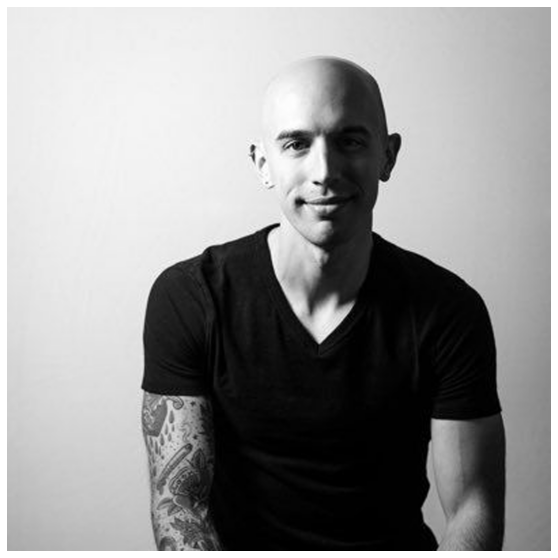

In [ ]:
imShow('predictions.jpg')